# Diagnosticos y seleccion de modelos de ML
En principio debemos partir los datos en por lo menos dos grupos. Grupo de entrenamiento y grupo de prueba. A veces se recomienda 3 grupos.

1. Entrenamiento: obvio para que es
2. Validacion (cross-validation): Se pueden probar distintos hiperparametros.
Los hiperparametros son cualquier parametro que no sea el $\theta$.
3. Prueba. Para verificar que no halla sobreajuste.

**Ejemplo 3.3.7**: Asuma que quiere realizar una regresion lineal (polinomica) pero que no esta seguro de cual es mejor grado del polinomio. Podemos probar con los tres de datos las siguientes 6 hipoteis (en 2D)

$$h_1(\theta, x) = \theta_0 + \theta_1 x  $$
$$h_2(\theta, x) = \theta_0 + \theta_1 x  + \theta_2 x^2  $$
$$ \vdots $$
$$h_6(\theta, x) = \theta_0 + \theta_1 x  + \theta_2 x^2  + \cdots + \theta_6 x^6 $$

Podemos probar estos 6 polinomios con los distintos datos. Reucerde la funcion de costo para regresion lineal (polinomica)

\begin{eqnarray}
J_{\text{train}} &=& \frac{1}{2 m_{train}}
\left [
    \sum_{i=1}^{m_{train}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{train}} \theta_i^2  
    \right ] \\
J_{cv}(\theta) &=&  \frac{1}{2 m_{cv}}
    \left [
    \sum_{i=1}^{m_{cv}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{cv}} \theta_i^2  
    \right ] \\
J_{\text{test}} &=& \frac{1}{2 m_{cv}}
    \left [
    \sum_{i=1}^{m_{test}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{test}} \theta_i^2  
    \right ] \\
\
\end{eqnarray}

# Bias vs Variance (sesgo vs varianza)

## Cualitativamente
* **Bias**: es el error global que se comente a hacer un ajuste. Estadisticamente es el error promedio entre la solucion media y la media obtenida.

* **Variance**: El error causado cuando tratamos de ajustar los datos muy cercanos a lo que queremos. Este ajuste puede hacer que el ML aprenda del ruido que tiene los datos causa "sobreajuste".

** **Ruido**:  Son imprecisiones debidas a los datos  o los sistemas electronicos.


Recordemos la funcion de costo de regresion lineal

$$J(\theta) = \frac{1}{2m} \left [
   \sum_{i=1}^m (h(\theta), x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^n \theta_j^2 \right ]  \tag{1} $$

El $1/2$ es conveniencia.

Asumimos un conjunto de datos (muestras) $x_1, x_2, \cdots, x_m$ que se ajustan a una funcion $f$ con ruido $\epsilon$ bajo el modelo analitico


$$ y = f(x) + \epsilon $$.

Con esto vamos a definir

## Cuantitativamente
* **MSE**: Means Square Error

$$\mathbb{E}[ (y - h(x))^2] = \sum_{i=1}^m (y_i - h(x_i))^2 p(x) $$
si $p(x)$ es uniforme entonces $p(x)=1/m$

$$\mathbb{E}[ (y - h(x))^2] = \frac{1}{m} \sum_{i=1}^m (y_i - h(x_i))^2  $$
fijense que esto, casualmente es la funcion de costo (1) (sin regularizacion y sin el 1/2).

Ignoramos el ruido $\epsilon = 0$.
* **Bias**
$$\mathrm{Bias}[ h(x) ] = \mathbb{E}[h(x)] - E [ f(x) ]  $$

* **Varianza**:

$$\mathrm{Var}[h(x)] = \mathbb{E}[h^2(x)] - \mathbb{E}^2[h(x)] $$

Vamos a ver que relacion hay entre estas 3 medidas cuantitativas (MSE, Bias, Variance).

$$\mathbb{E}[ (y - h(x))^2] =\mathbb{E}[ y^2 - 2 y h(x) + h(x)^2] = y^2 - 2y \mathbb{E}[h(x)] + \mathbb{E}[h^2(x)]  \quad , \quad \text{MSE} $$

\begin{eqnarray}
\text{Bias}^2[h(x)] &=&  (\mathbb{E}[h(x)] - E [ f(x) ])^2 \\
&=& \mathbb{E}^2[h(x)] - 2 \mathbb{E}[h(x)] \mathbb{E} [f(x)] + \mathbb{E}^2 [ f(x) ] \\
&=& \mathbb{E}^2[h(x)] - 2 y \mathbb{E}[h(x)] + y^2 \\
\text{Var}[h(x)] &=& \mathbb{E}[h^2(x)] - \mathbb{E}^2[h(x).
\end{eqnarray}

Es el momento de comparar las tres

$$ \mathbb{E}[(y- h(x))^2] =  y^2 - 2y \mathbb{E}[h(x)] + \mathbb{E}[h^2(x)]
= y^2 - 2 y \mathbb{E} [ h(x)] + \mathbb{E}^2[h(x)]  + \mathrm{E}[h^2(x)] - \mathbb{E}^2 [ h(x)]  $$

Es decir

$$\text{MSE} = \text{Bias}^2 + \text{Var} $$
Mas concretamente

$$\mathbb{E}[ (y - h(x))^2] = \text{Bias}^2[h(x)] + \text{Var}[h(x)] $$

Si tuvieramos un MSE constante entonces entre la varianza y el Bias$^2$ hay un "tradeoff" (compromiso), es decir si la una sube, la otra baja.

La Figura 3.76 se llama el "bull-eye" (ojo de buey, tiro al blanco) explica de cierta forma la relacion entre "bias" y "variance" (tomado de StackExchange).

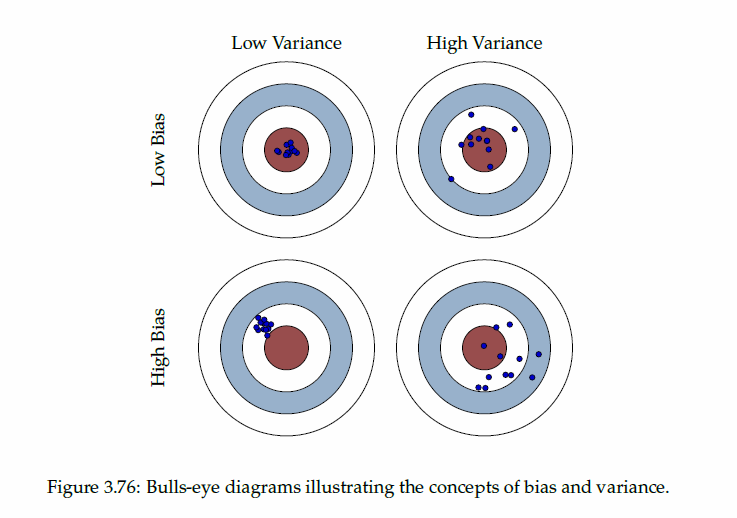

Ya de forma oral explique el significado de la Figura 3.76.o

La Figura 3.77 muestra tres casos que contrastan bias vs variance

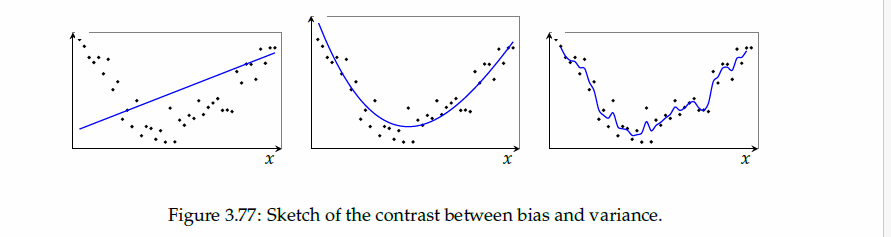

La explicacion de la Figura 3.77 se hizo de forma oral.o
La Figura 3.78 muestra la relacion entre MSE-Bias-Variance de forma cualitative.

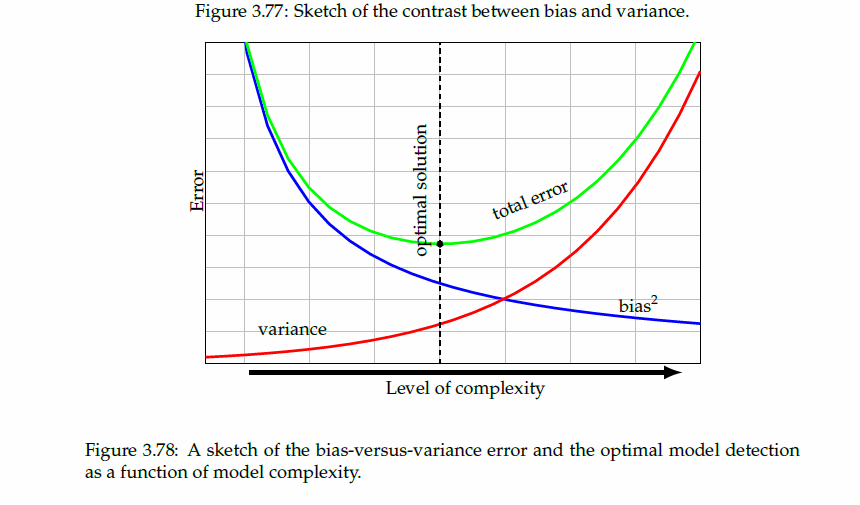

La Figura 3.78 se explico verbalmente (oralmente)
# Learning Curves: Curvas de aprendizaje
Son curvas donde diagnosticamos "overfitting" o "underfitting"

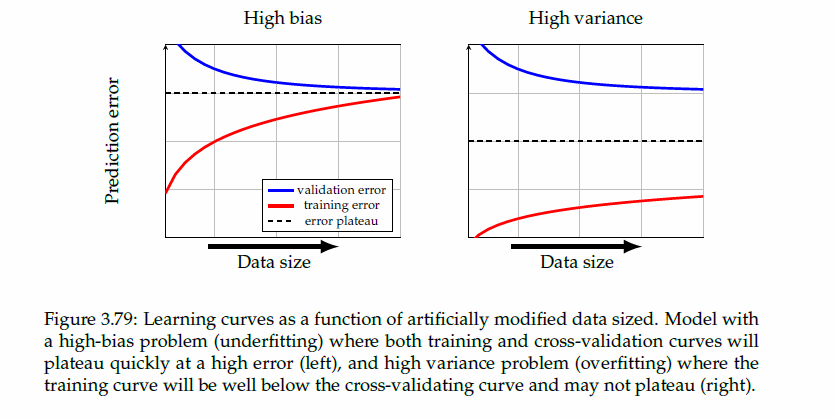

Varios comentarios al respecto

* **High-bias** (sesgo alto): Esto es un sintoma de "underfitting" (subajuste).
Vamos a ver como se puede curar en un momento

* **High variance**: Estas curvas sirve para diagosticar "overfitting" (sobreajuste). Vamos a ver como se pueden "curar" estos problemas.

* Para arregla el "high variance" (overfitting)
    * Incrementar el numero de datos.
    * Reducir el numero de parametros.
    * Incrementar $\lambda$ (regularizacion)

* Para arregla el "high bias" (underfitting)
    * Disminuir el numero de datos.
    * aumentar el numero de parametros.
    * reducir $\lambda$ (regularizacion)



# Support Vector Machines (Maquinas de soporte vectorial)
Vladimir Vapnik en los 1962, creo esta idea como parte de su tesis doctoral.
Este metodo hoy por hoy es muy eficiente pero tardo mucho tiempo en ser reconocido. Vapnik inmigro a los estados unidos en 1992. Sometio tres articulos a la presitigiosa revista
[Conference on Neural Information Processing Systems](https://neurips.cc/).
Lamentablemente los 3 fueron rechazados.

Mas tarde Vapnik tuvo apuesta con un companhero de trabajo para probar que su sistema era mejor que la ANN para identificar digios manuscritos. Gano la apuesta. Mas tarde Isabelle Guyon introdujo el metodo del "kernel trick" que veremos en la proxima clase y con el cual el SVM se vuelve mucho mas eficiente.

Veamos algo de intuicion

La regresion lineal para una nube de puntos en $\mathbb{R}^2$ se calcula con el fin de obtner una recta $y = ax + b$, con pendiente $a$ e intercepto $b$.
La funcion de costo para la nube de puntos

$$J(a,b) = \frac{1}{2m} \sum_{i=1}^m [ y_i - (a x_i + b)]^2 $$
Es clasico Least Square Problem. En este problema se busca minimizar $J(a,b)$.

De otro lado el problema de SVM busca maximizar

$$J(a,b) = \frac{1}{2m} \sum_{i=1}^m d^2[ (x_i, y_i) , L(a,b)] $$

# Aplicaciones.
Tarea.

## Hiperplanos de separacion y vectores de soporte.

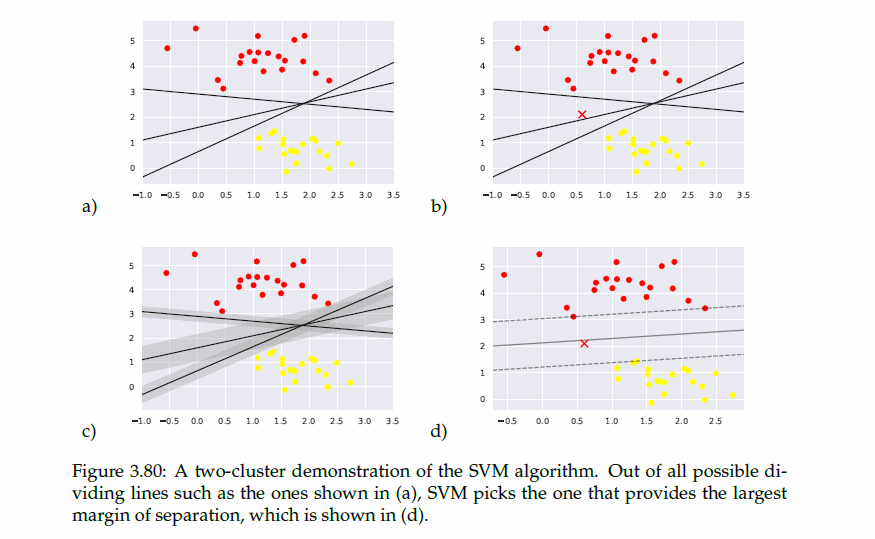

Si en vez de 50 puntos, tomamos 100 puede pasar lo que mostramos en la Figura 3.81

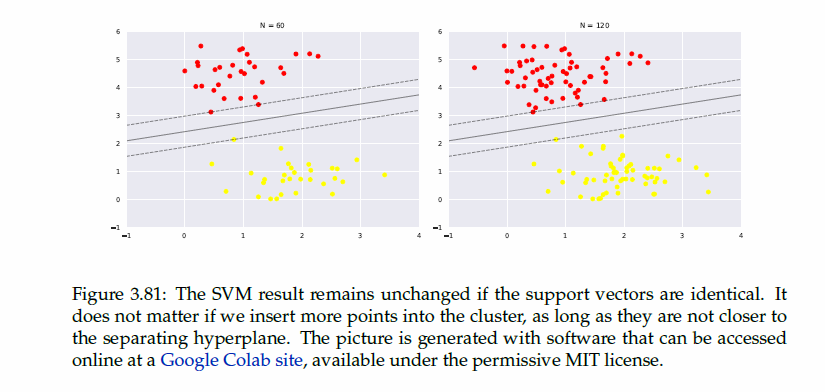

# Elaboracion de la funcion de costo.
Asumimos que tenemos una coleccion de puntos $x^{(1)}, x^{(2)}, \cdots , x^{(m)} $, que son **linealmente separables**. Los puntos, pensemolos en $\mathbb{R}^2$ como $(x_1, x_2)^{(1)}, (x_1, x_2)^{(2)}, \cdots , (x_1, x_2)^{(m)} $
Vamos a etiquetar los puntos como **positivos** $\oplus$ y **negativos** $\ominus$. La Figura 3.82 nos ayuda a comprender el escenario.

$$x_2 = a x_1 - b $$
$$0 = a x_1 - x_2 - b $$

$$0 = \binom{a}{-1}^T \binom{x_1}{x_2} - b $$

Esto mismo lo puede hacer en $\mathbb{R}^n$ y escribir

$$0 = w^T x - b $$
con $w,x \in \mathbb{R}^n$, $b \in \mathbb{R}$
donde $w$ es normal al plano. Este es un plano que es normal a $w$  y pasa por el intercpto $b$.

Pensemos que nos podemos alejar de este plano una distancia $\delta$,

es decir

$$\delta = w^T x - b $$



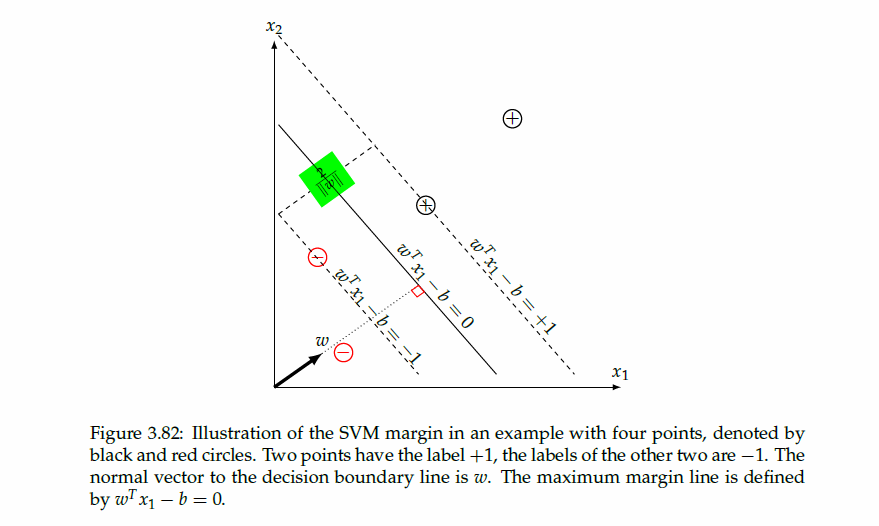

Hay puntos positivos $\oplus$ sobre el hiperplano divisorio y negativos $\ominus$ debajo de esta linea.  Es decir

Considere un punto $x^{(i)}$ puede estar por encima o por debajo de la linea separatoria (hiperplano).
$$w^T x^{(i)} - b \ge 0   \quad , \quad \text{si } y{(i)} = 1$$
$$w^T x^{(i)} - b < 0   \quad , \quad \text{si } y{(i)} = -1$$

Podemos, por generalidad encontrar nuevas hiperplanos paralelos (verma) con separacion $\delta$ del hiperplano principal

$$w^T x^{(i)} - b = \delta   \quad , \quad \text{si } y{(i)} = 1$$
$$w^T x^{(i)} - b =-\delta   \quad , \quad \text{si } y{(i)} = -1$$

Estas dos ecuaciones se pueden escribir en una sola como sigue

$$y^{(i)}(w^T x^{(i)} - b) = \delta \tag{2} $$

El ancho entre las dos lineas "verma" se puede probar (ver problema 13 de la seccion de problemas de Algbebra Lineal),
Esta es la distancia entre las dos Ecuaciones (2) (para +1 y para -1)
$$\frac{2 \delta}{\| w \| } \tag{3}  $$

Veams que, sin perdida de generalidad , $\delta=1$ esta bien para eliminar esta variable y centrarnos en los $\theta$'s que son $w, b$.


Arrancando de la Ecuacion (2) y dividiendo por $\delta$ encontramos
$$y^{(i)}(w^T x^{(i)} - b) = \delta $$

$$y^{(i)}\bigg (\frac{w^T}{\delta} x^{(i)} - \frac{b}{\delta} \bigg) = 1 $$
Yo puedo redefinir las variables $w, b$ como
$$ w \leftarrow \frac{w}{\delta}$$
$$ b \leftarrow \frac{b}{\delta}$$
El problema se reduce a

$$y^{(i)}(w^T x^{(i)} - b) = 1 $$

Mas alla que eseto podemos formular la ecuacion

$$y^{(i)}(w^T x^{(i)} - b) \ge 1 $$

Yo quiero maximizar la expresion (3) $2/| w \|$.
Pero hay varias cosas:

* Nosotros estamos acostumbrados a minimizar en vez de maximizar.
* Nos gusta trabajar con cuadrados por que $\| w \|$ es una raiz cuadrada.

Entonces pensemos en el siguiente problema

$$\min \frac{\| w \|^2 }{2} \quad , \quad \text{ sujeto a }
y^{(i)}(w^T x^{(i)} - b) \ge 1 $$

## Regularizacion
La siguiente funcion de costo nos sirve de regularizacion. Lo explico en un momento.


$$J(w, b) = \frac{\| w \|^2}{2} + C \sum_{i=1}^m (1 - y^{(i)}[w^T x^{(i)}-b]) $$

El segundo termino de regularizacion es una funcion **penalty**. En que sentido?

La restriccion es (el lado correcto del problema)
$$y^{(i)}(w^T x^{(i)} - b) \ge 1 $$
$$y^{(i)}(w^T x^{(i)} - b) - 1 \ge 0  $$
$$1 - y^{(i)}(w^T x^{(i)} - b)  \le  0  \tag{4} $$
$C>0$ y cuando $C$ es grande y el punto esta donde no le corresponde (4) entonces penalizamos la funcion de costo.

El ejemplo esta en el ejercio que tienen para presentar en la proxima tarea.


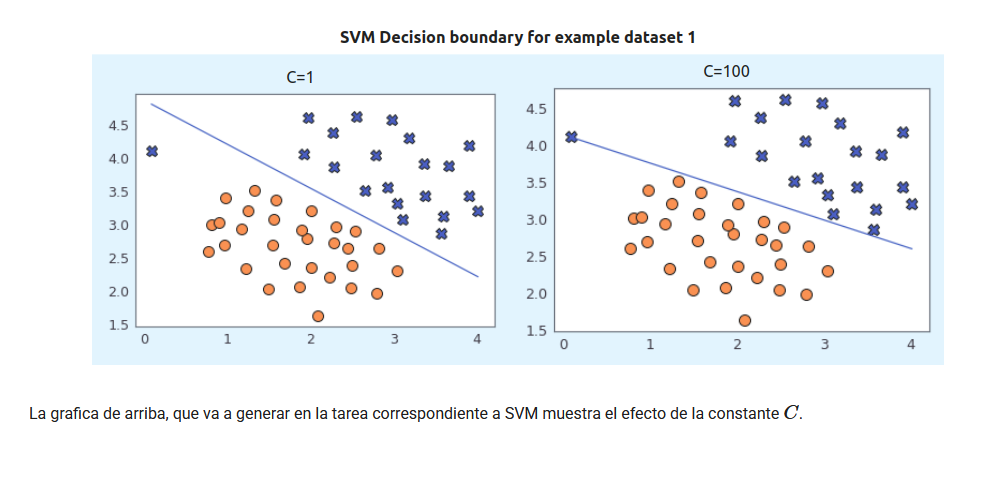

Esta figura la ya explique y corresonde a la proxima tarea.
La Figura 3.83 muestra un caso especial de puntos que no son
**linealmente separables**. Para esto se pueden usar dos herramientas:

* Regularizacion (ver la tarea 13) la variable $C$
El valor de $C$ es contrario al de $\lambda$. $C$ muy grande es menos regularizaicon y $C$ pequenho es mas regularizacion.

* El uso de Kernels. Esto lo muestro en la proxima clase.

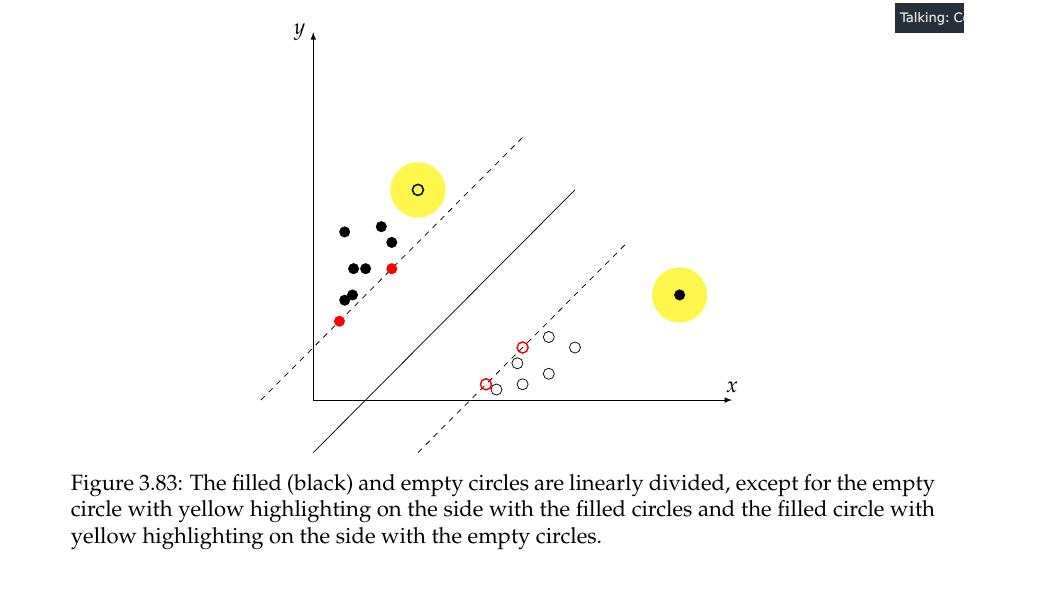

# Proxima clase: Uso de Kernels.